**NAME : Sumeet Kumbar**

**Practical 5**

1. Implement logistic regression using Python/R to perform 
classification on Social_Network_Ads.csv dataset.

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, 
Precision, Recall on the given dataset.

In [54]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [55]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [57]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [58]:
X=df.drop(['Gender','Purchased'],axis=1)
Y= df['Purchased']
X.head()

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000


**Split the data into Train set and Test set**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


**Build the model**

In [60]:
from sklearn.linear_model import LogisticRegression
basemodel= LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:", basemodel.score(X_train,y_train)*100)

Training accuracy: 78.75


**Make predictions on test data**

In [61]:
y_predict= basemodel.predict(X_test)
print("Testing accuracy:", basemodel.score(X_test,y_test)*100)

Testing accuracy: 73.75


**Normalize the data using Min Max Normalization or any other technique**

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [63]:
X=df[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [64]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5


**Measure the performance of the model**

1.Measure the accuracy
2.Measure the perormance using Precision, Recall, Fscore, Support etc

In [65]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test,y_predict)
print(Acc)

0.875


In [66]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[51  1]
 [ 9 19]]


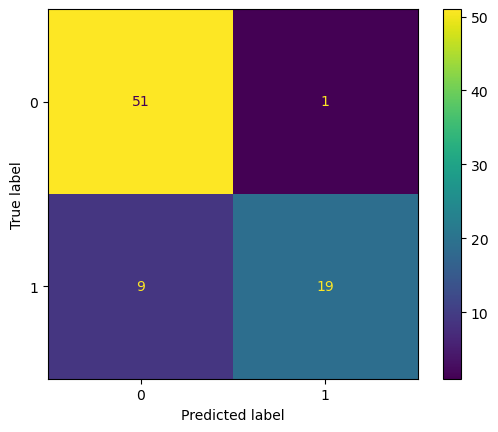

In [67]:
disp.plot()
plt.show()

In [68]:
from sklearn.metrics import precision_recall_fscore_support
prf= precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]


In [69]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

